## modeling

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn import metrics
from textblob import TextBlob, Word

%matplotlib inline 

In [ ]:
# import cleaned comments data from csv
df_all = pd.read_csv('../data/alltogether.csv')
df_all.head()

,all_text,is_parent
0,We recently found a drop in daycare for my 3yr...,1
1,So I've lurked on this sub for a long time as ...,1
2,So my 20yr old son came back to live with me a...,1
3,"I feel bad about posting, since I had all the ...",1
4,My Steam library is looking a bit thin when it...,1


In [2]:
from google.colab import files   # This is for colab use
uploaded = files.upload()

Saving alltogether.csv to alltogether.csv


In [5]:
import io
df_all = pd.read_csv(io.BytesIO(uploaded['alltogether.csv']))

In [6]:
df_all.shape

(19716, 2)

In [ ]:
df_all.tail()

,all_text,is_parent
19711,"fromcomments, I would love to get paid overtim...",0
19712,"fromcomments, The Road by Cormac McCarthy, fro...",0
19713,"fromcomments, It is very district based, somet...",0
19714,"fromcomments, I had a MS class like that a few...",0
19715,"fromcomments, Oh. \n\nHere, go [one by one](ht...",0


In [9]:
X = df_all['all_text']
y = df_all['is_parent']

y.value_counts(normalize=True)

# the classes are balanced, each is approx 50%


1    0.500254
0    0.499746
Name: is_parent, dtype: float64

In [10]:
# train/test split
# stratify y just in case, even though the classes are balanced
# test_size : default = 0.25
# shuffle: default = True

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [11]:
# edit stop words
from sklearn.feature_extraction import text

text.ENGLISH_STOP_WORDS

add_stop_words = ['did', 'fromsubmission','fromcomments','doe', 'don', 'doesn', 'getting', 'going', 'got', 'ha', 'isn', 'wa', 've', 'll']

stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

In [13]:
#stop_words

cvec = CountVectorizer(analyzer = "word",                        
                         tokenizer = None, 
                         preprocessor = None,
                         stop_words = "english", 
                         max_features = 10000)

In [14]:
# using standard stop words = "english"
# using CountVectorizer and LogisticRegression

cvec = CountVectorizer(stop_words = 'english')
                       
lr = LogisticRegressionCV(solver = 'liblinear')

pipe = Pipeline([
    ('cvec', cvec),
    ('lr', lr)
])

In [15]:
# baseline Logistic model

pipe.fit(X_train, y_train)
print('train score:', pipe.score(X_train, y_train))
print('test score:', pipe.score(X_test, y_test))

train score: 0.9615202542774058
test score: 0.9026171637248935


In [ ]:
lr_feat00 = pd.DataFrame(data=lr.coef_.T, index=cvec.get_feature_names())
lr_feat00.columns = ['coef_']
lr_feat00['abs_coef'] = np.abs(lr_feat00['coef_'])
#lr_feat00.sort_values(by='abs_coef', ascending=False).head(30)

In [ ]:
# using additional stop words
# using CountVectorizer and LogisticRegression

cvec = CountVectorizer(stop_words = stop_words)

lr = LogisticRegressionCV(solver = 'liblinear') 

pipe = Pipeline([
    ('cvec', cvec),
    ('lr', lr)
])

In [ ]:
pipe.fit(X_train, y_train)
print('train score:', pipe.score(X_train, y_train))
print('test score:', pipe.score(X_test, y_test))

train score: 0.9598295800365185
test score: 0.9030229255427065


In [ ]:
lr_feat01 = pd.DataFrame(data=lr.coef_.T, index=cvec.get_feature_names())
lr_feat01.columns = ['coef_']
lr_feat01.sort_values(by='coef_', ascending=False).head(30)

,coef_
baby,2.244520
daughter,2.241332
son,2.197862
toddler,1.734605
old,1.617071
husband,1.541356
parenting,1.515117
divorce,1.493014
child,1.376642
removed,1.339572


### random forest

In [ ]:
# using standard stop words = "english"
# using CountVectorizer and random forest

cvec = CountVectorizer(analyzer = "word",                        
                         tokenizer = None, 
                         preprocessor = None,
                         stop_words = "english", 
                         max_features = 10000)
rf = RandomForestClassifier(random_state = 42)

pipe = Pipeline([
    ('cvec', cvec),
    ('rf', rf)
])

pipe.fit(X_train, y_train)
print('train score:', pipe.score(X_train, y_train))
print('test score:', pipe.score(X_test, y_test))

train score: 0.9961452627307771
test score: 0.8965307364576993


In [ ]:
rf_feat = cvec.get_feature_names()
rf_feat_imp = rf.feature_importances_

df_rf_feat00 = pd.DataFrame(data=rf_feat_imp, index=rf_feat)


In [ ]:
df_rf_feat00.sort_values(by=0, ascending=False).head(30)

,0
teacher,0.027851
teachers,0.022342
students,0.021288
baby,0.020235
old,0.019201
son,0.018859
teaching,0.018098
student,0.015555
daughter,0.015310
child,0.014994


In [ ]:
df_rf_feat00.sort_values(by=0, ascending=False).tail(20)

,0
grandkids,0.0
brows,0.0
nonexistent,0.0
groundwater,0.0
nipple,0.0
nipples,0.0
groans,0.0
adjustments,0.0
grinding,0.0
nodules,0.0


## tf with logisticRegression and random forest

In [ ]:
# tfidf using "english" stop words, 1-grams

tfidf = TfidfVectorizer(analyzer = "word", 
                     stop_words = "english", 
                     max_features = 10000)

lr = LogisticRegressionCV(solver = 'liblinear') #LogisticRegression()

pipe = Pipeline([
    ('tf', tfidf),
    ('lr', lr)
])

In [ ]:
pipe.fit(X_train, y_train)
print('train score:', pipe.score(X_train, y_train))
print('test score:', pipe.score(X_test, y_test))

train score: 0.9639548251842834
test score: 0.9105295191722459


In [ ]:
lr_tf_feat00 = pd.DataFrame(data=lr.coef_.T, index=cvec.get_feature_names())
lr_tf_feat00.columns = ['coef_']
lr_tf_feat00['abs_coef'] = np.abs(lr_tf_feat00['coef_'])
lr_tf_feat00.sort_values(by='abs_coef', ascending=False).head(10)

,coef_,abs_coef
teachers,-11.083634,11.083634
students,-10.943303,10.943303
son,10.420497,10.420497
daughter,9.617517,9.617517
teacher,-9.350757,9.350757
student,-9.236093,9.236093
old,9.191359,9.191359
baby,9.062991,9.062991
teaching,-8.564271,8.564271
admin,-7.772167,7.772167


## tfidf with rondom forest

In [ ]:
tfidf = TfidfVectorizer(analyzer = "word", 
                     stop_words = "english", 
                     max_features = 10000)

rf = RandomForestClassifier(random_state = 42)

pipe = Pipeline([
    ('tf', tfidf),
    ('rf', rf)
])

pipe.fit(X_train, y_train)
print('train score:', pipe.score(X_train, y_train))
print('test score:', pipe.score(X_test, y_test))

train score: 0.9961452627307771
test score: 0.8906471900994116


In [ ]:
rf_feat = tfidf.get_feature_names()
rf_feat_imp = rf.feature_importances_

df_rf_feat00 = pd.DataFrame(data=rf_feat_imp, index=rf_feat)


In [ ]:
df_rf_feat00.sort_values(by=0, ascending=False).head(30)

,0
teacher,0.028775
teachers,0.022631
baby,0.021238
son,0.020769
students,0.020234
old,0.020114
school,0.017508
teaching,0.016932
student,0.016612
child,0.015030


In [ ]:
# CountVectorizer and MultinomialNB

pipe_cv_mnb = Pipeline([
    ('cv', CountVectorizer(stop_words = stop_words)),
    ('mnb', MultinomialNB())
])

pipe_cv_mnb.fit(X_train, y_train)
pipe_cv_mnb.score(X_train, y_train), pipe_cv_mnb.score(X_test, y_test)

(0.9256779603705958, 0.8969364982755123)

In [ ]:
pipe_tf_mnb = Pipeline([
    ('tf', TfidfVectorizer(stop_words = stop_words)),
    ('mnb', MultinomialNB())
])

pipe_tf_mnb.fit(X_train, y_train)
print(pipe_tf_mnb.score(X_train, y_train), pipe_tf_mnb.score(X_test, y_test))


0.9380536958138905 0.9020085209981741


In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import Recall
from tensorflow.keras.utils import plot_model

In [18]:
X_train.shape[0]

14787

Using Keras

In [30]:
from sklearn.model_selection import train_test_split



sentences = df_all['all_text'].values
y = df_all['is_parent'].values

sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)

X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)
X_train

<14787x27076 sparse matrix of type '<class 'numpy.int64'>'
	with 956735 stored elements in Compressed Sparse Row format>

In [32]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [33]:
print("Accuracy:", score)

Accuracy: 0.9032258064516129


In [34]:
from keras.models import Sequential
from keras import layers

input_dim = X_train.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [35]:
model.compile(loss='binary_crossentropy', 
             optimizer='adam', 
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                270770    
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 270,781
Trainable params: 270,781
Non-trainable params: 0
_________________________________________________________________


In [36]:
history = model.fit(X_train, y_train,
                   epochs=10,
                    verbose=False,
                     validation_data=(X_test, y_test),
                     batch_size=10)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_2/dense_4/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_2/dense_4/embedding_lookup_sparse/Reshape:0", shape=(None, 10), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_2/dense_4/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)


In [37]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))


Training Accuracy: 0.9931
Testing Accuracy:  0.8941


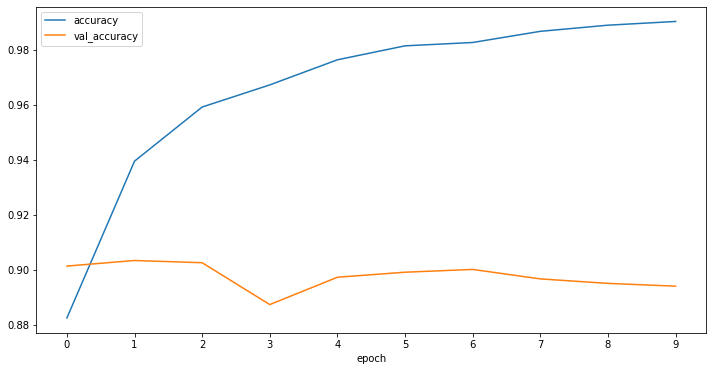

In [38]:
history_df = pd.DataFrame(history.history)

# plot accuracy vs epoch
history_df.filter(like='accuracy').plot(xticks=history_df.index, figsize=(12,6), xlabel='epoch');

